# Machine learning techniques

In [1]:
import random as rd
rd.seed(0)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [3]:
raw_data = pd.read_csv('/content/Titanic-Dataset.csv', index_col='PassengerId')
raw_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Next, we can explore the dataset.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
raw_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


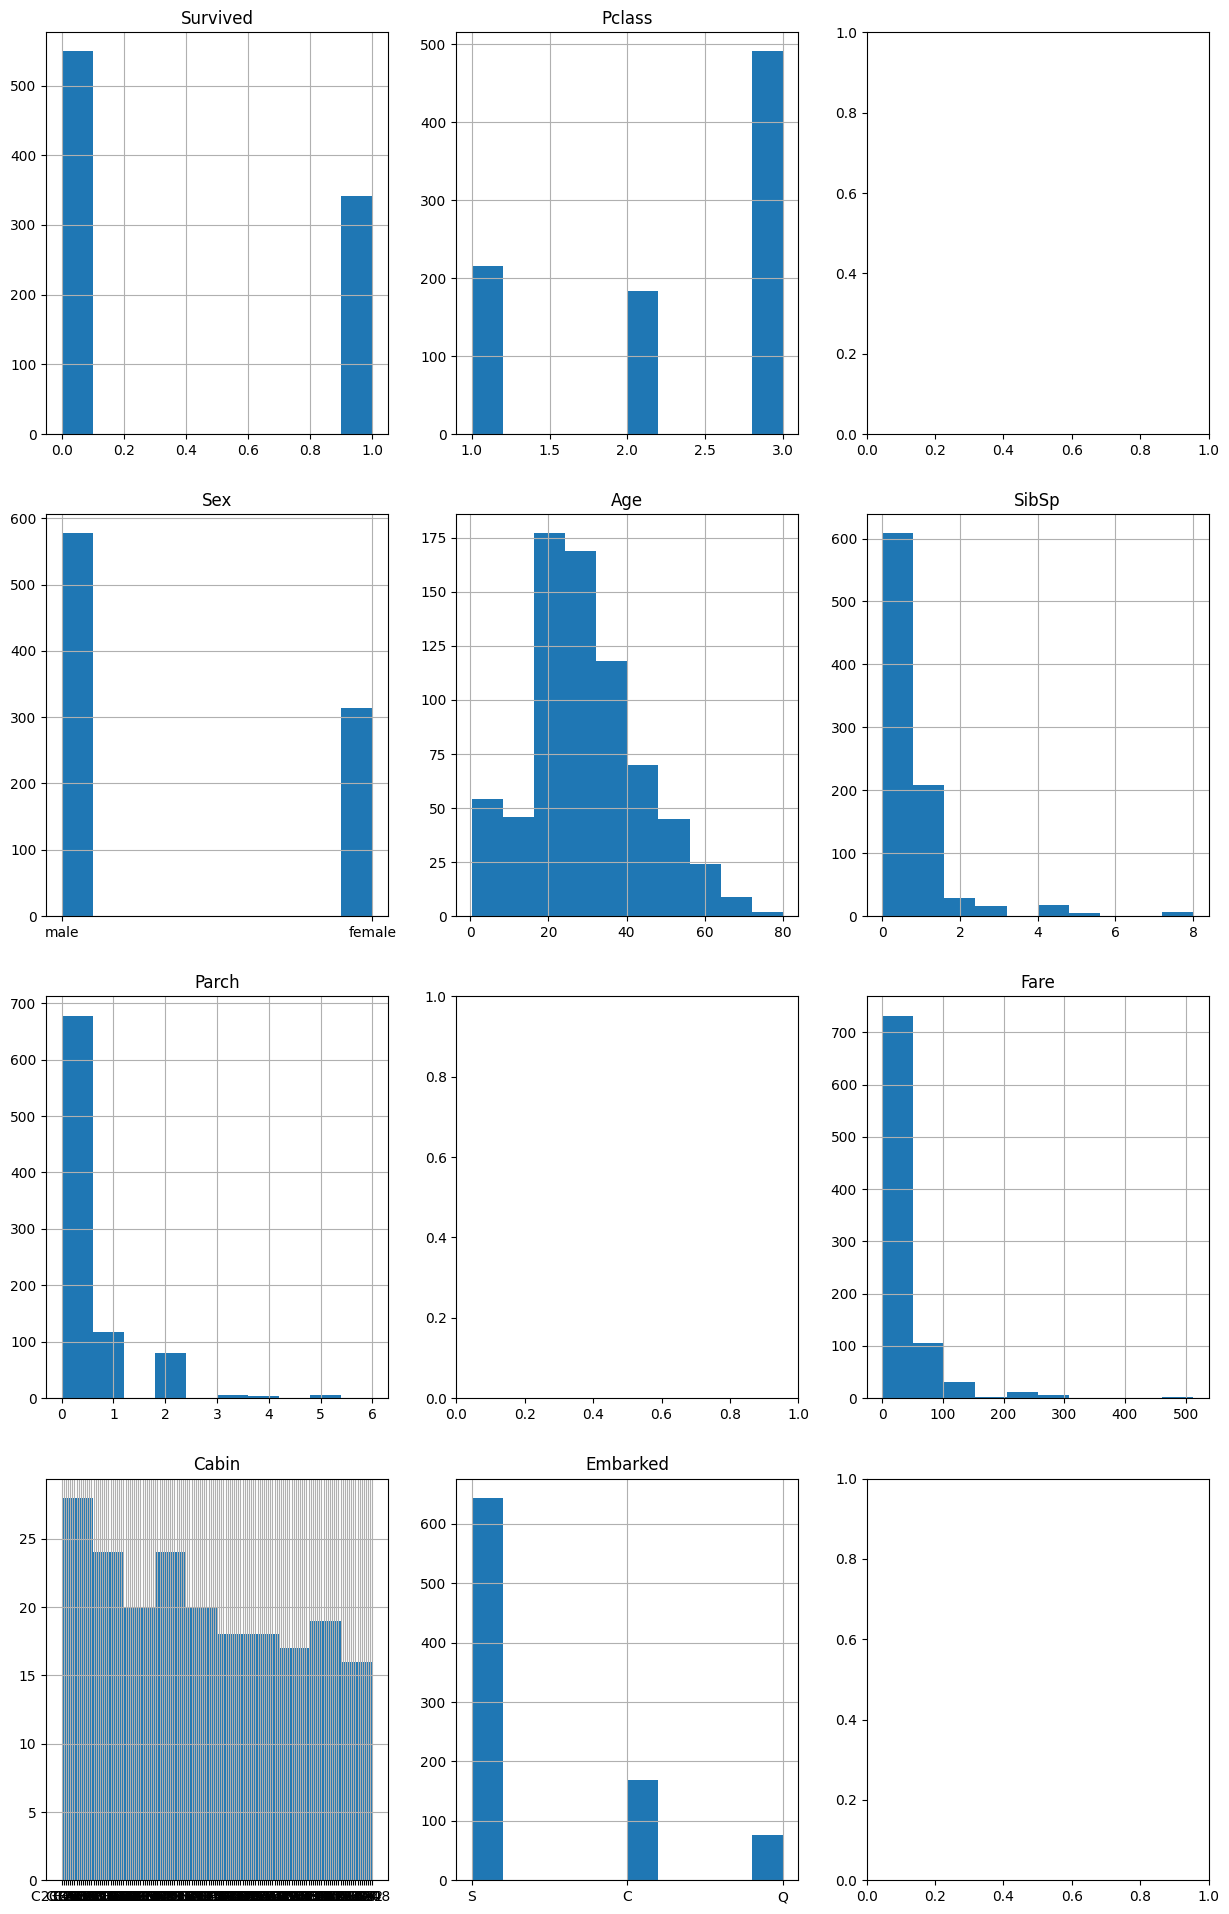

In [6]:
num_columns = len(raw_data.columns)

num_rows = 4
num_cols = 3

exclude_columns = ['Name', 'Ticket']

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6*num_rows))

axes = axes.flatten()
for i, col in enumerate(raw_data.columns):
    if col in exclude_columns:
          continue
    raw_data[col].hist(ax=axes[i])
    axes[i].set_title(col)

plt.show()

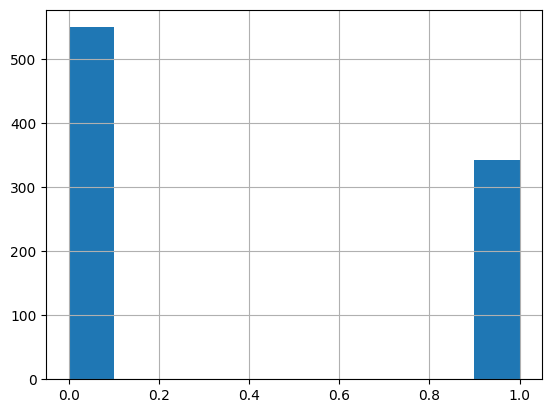

In [7]:
raw_data['Survived'].hist()
plt.show()


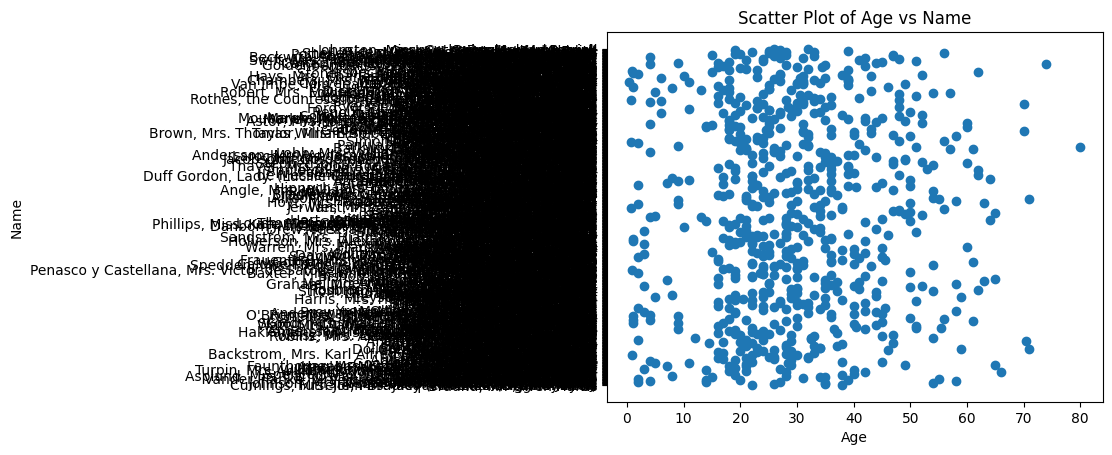

In [8]:
plt.scatter(raw_data["Age"], raw_data["Name"])
plt.xlabel("Age")
plt.ylabel("Name")
plt.title("Scatter Plot of Age vs Name")
plt.show()

In [9]:
raw_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
raw_data['Survived'].value_counts()[1]

342

[38.70967742 59.80392157 65.         56.28742515 61.79775281 58.33333333
 68.42105263 85.71428571]


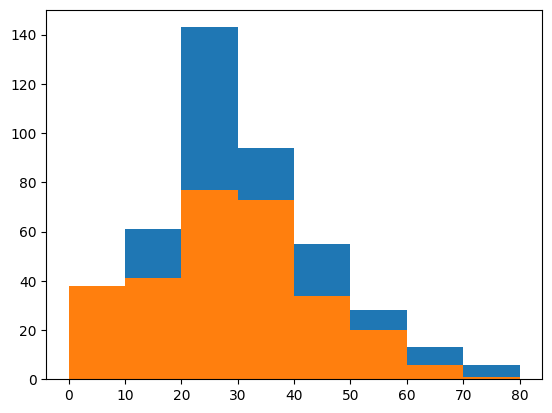

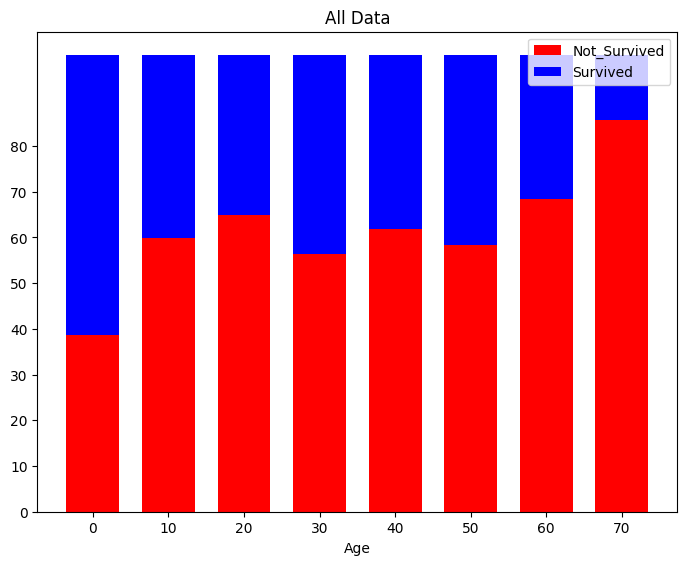

<ipython-input-11-a6a8bd29fa70>:29: RuntimeWarning: invalid value encountered in divide
  stacked_data = 100*values /values.sum(axis=0)


[36.66666667 24.44444444 27.77777778 16.66666667 31.25       11.11111111
  0.                 nan]


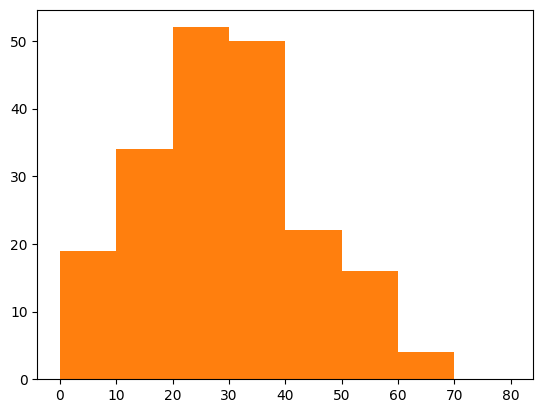

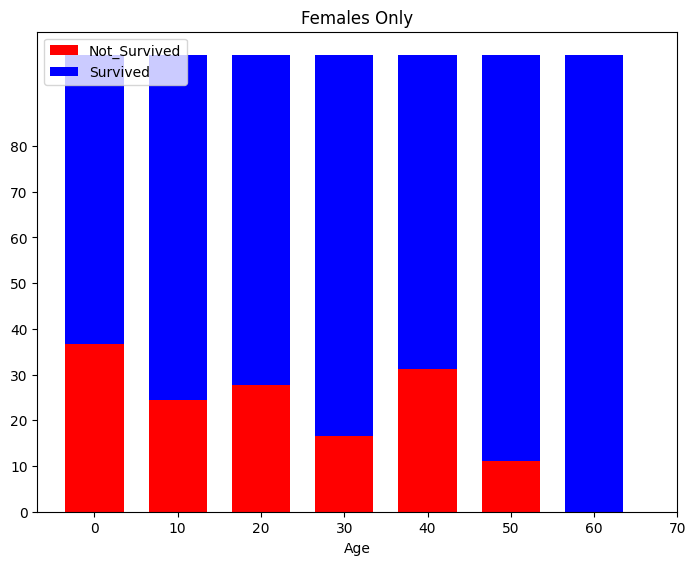

[40.625      87.71929825 83.10810811 78.5046729  78.94736842 86.66666667
 86.66666667 85.71428571]


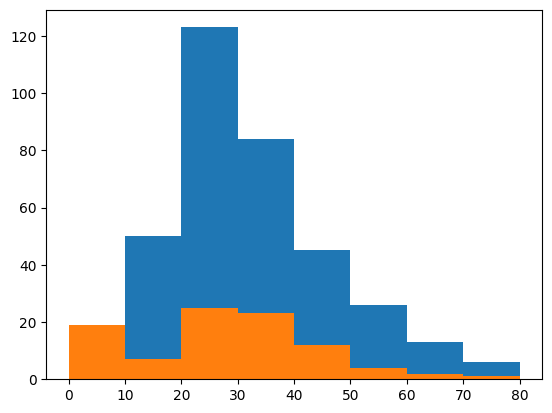

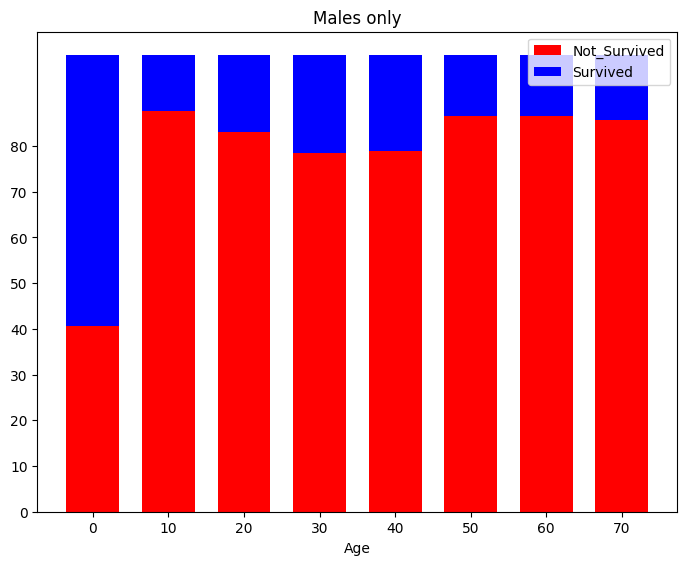

In [11]:
a=raw_data.where(raw_data["Survived"]==0)[["Age","Survived"]]
b=raw_data.where(raw_data["Survived"]==1)[["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()


a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="female"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="female"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="male"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="male"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N) # the x locations for the groups
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()



## 12.2. Cleaning up the data

Now, let's look at how many columns have missing data

In [12]:
# use pandas to check missing data (NA(not available) values) for all the columns
raw_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [13]:
# Use pandas to drop "Cabin" column
clean_data = raw_data.drop(columns=['Cabin'])

In [14]:
clean_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [15]:
median_age = clean_data['Age'].median()
median_age

28.0

In [16]:
# use pandas to fill the na values in age column with the median age
clean_data["Age"] = clean_data["Age"].fillna(median_age)

In [17]:
# use pandas to fill the na values in embarked column with 'U'
clean_data["Embarked"] = clean_data["Embarked"].fillna('U')

In [18]:
clean_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
clean_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


### 12.2.3 Saving our data for the future

In [20]:
clean_data.to_csv('/content/clean_titanic_data.csv')

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [21]:
preprocessed_data = pd.read_csv('/content/clean_titanic_data.csv')
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
preprocessed_data = pd.get_dummies(preprocessed_data, columns=['Embarked', 'Pclass', 'Sex'])

In [23]:
preprocessed_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,False,True,False,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True,False,True,False,False,True,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True,False,False,False,True,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False,False,True,False,False,False,True


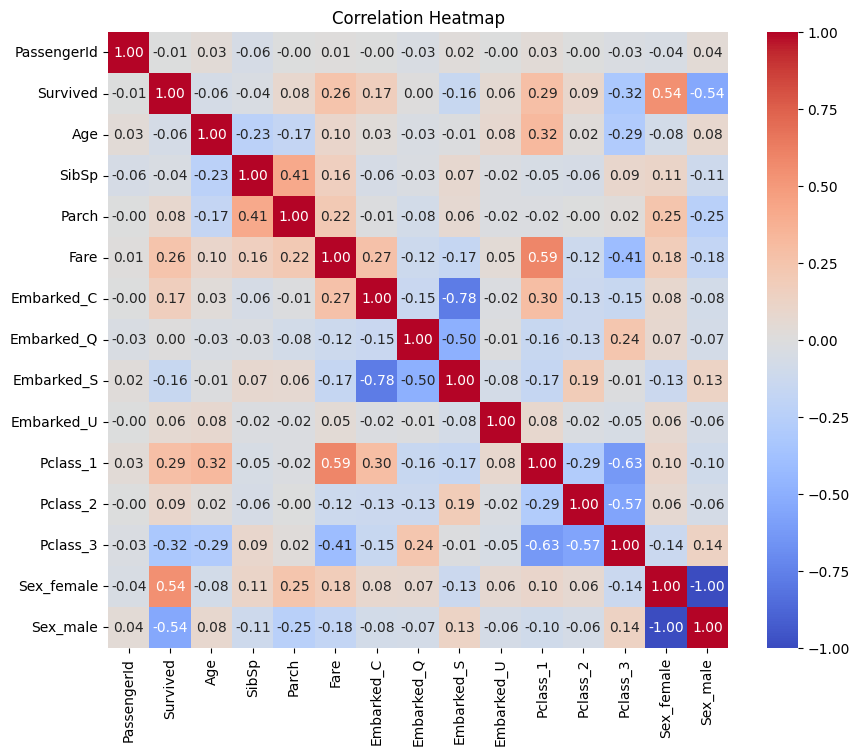

In [24]:
data = preprocessed_data.drop(columns=['Ticket','Name'])

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 12.3.2 Binning

In [25]:
preprocessed_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,False,True,False,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True,False,True,False,False,True,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True,False,False,False,True,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False,False,True,False,False,False,True


In [26]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

categorized_age = pd.cut(preprocessed_data['Age'], bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)
preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Categorized_age
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,False,True,False,False,False,True,False,True,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,False,False,True,False,False,True,False,"(30, 40]"
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,False,False,True,False,False,False,True,True,False,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,False,False,True,False,True,False,False,True,False,"(30, 40]"
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,False,False,True,False,False,False,True,False,True,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,False,False,True,False,False,True,False,False,True,"(20, 30]"
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,False,False,True,False,True,False,False,True,False,"(10, 20]"
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,False,False,True,False,False,False,True,True,False,"(20, 30]"
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,True,False,False,False,True,False,False,False,True,"(20, 30]"


In [27]:
preprocessed_data=pd.get_dummies(preprocessed_data, columns=['Categorized_age'])

preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Sex_female,Sex_male,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,False,...,True,False,False,False,False,True,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,False,False,True,...,True,False,False,False,True,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,False,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,False,False,True,...,False,True,False,False,True,False,False,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,False,False,True,...,True,False,False,True,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,False,False,True,...,True,False,False,False,True,False,False,False,False,False
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,True,False,False,...,False,True,False,False,True,False,False,False,False,False


### 12.3.4 Feature selection

In [28]:
preprocessed_data = preprocessed_data.drop(columns=['Name','Ticket','PassengerId'])

preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,...,Sex_female,Sex_male,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,False,False,True,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False


### 12.3.5 Saving for future use

In [29]:
preprocessed_data.to_csv('/content/preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [30]:
data = pd.read_csv('/content/preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,...,Sex_female,Sex_male,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,False,False,True,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False


### 12.4.1 Features-labels split and train-validation split

In [31]:
features = data.drop(columns=['Survived'])
labels = data['Survived']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size=0.4,
                                                                                                  random_state=100)

In [34]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test =train_test_split(features_validation_test, labels_validation_test,
                                                                                     test_size=0.5, random_state=100)

In [35]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### 12.4.2 Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [36]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
print("score for training data: ", lr_model.score(features_train, labels_train)*100)

score for training data:  83.52059925093633


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)

DecisionTreeClassifier()

In [39]:
print("score for training data: ", dt_model.score(features_train, labels_train)*100)

score for training data:  96.25468164794007


In [40]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(features_train, labels_train)

SVC()

In [41]:
print("score for training data: ", svm_model.score(features_train, labels_train)*100)

score for training data:  68.72659176029963


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)

RandomForestClassifier()

In [43]:
print("score for training data: ", rf_model.score(features_train, labels_train)*100)

score for training data:  96.25468164794007


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(features_train, labels_train)

GradientBoostingClassifier()

In [45]:
print("score for training data: ", gb_model.score(features_train, labels_train)*100)

score for training data:  90.0749063670412


In [46]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)

AdaBoostClassifier()

In [47]:
print("score for training data: ", ab_model.score(features_train, labels_train)*100)

score for training data:  84.6441947565543


### 12.4.3 Evaluating the models

#### Accuracy

In [48]:
# print accuracy of each model on validation data

from sklearn.metrics import accuracy_score
# Calculate accuracy scores for each model
logistic_regression_score = accuracy_score(labels_validation, lr_model.predict(features_validation))*100
dt_score = accuracy_score(labels_validation, dt_model.predict(features_validation))*100
svm_score = accuracy_score(labels_validation, svm_model.predict(features_validation))*100
rf_score = accuracy_score(labels_validation, rf_model.predict(features_validation))*100
gradient_boosting_score = accuracy_score(labels_validation, gb_model.predict(features_validation))*100
adaboost_score = accuracy_score(labels_validation, ab_model.predict(features_validation))*100

# Print the accuracy scores
print("Scores of the models")
print("Logistic regression:", logistic_regression_score)
print("Decision tree:", dt_score)
print("SVM:", svm_score)
print("Random forest:", rf_score)
print("Gradient boosting:", gradient_boosting_score)
print("AdaBoost:", adaboost_score)

Scores of the models
Logistic regression: 76.96629213483146
Decision tree: 76.96629213483146
SVM: 67.97752808988764
Random forest: 75.84269662921348
Gradient boosting: 80.89887640449437
AdaBoost: 76.40449438202246


#### F1-score

In [49]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score

# Calculate f1_score for each model
logistic_regression_score = f1_score(labels_validation, lr_model.predict(features_validation))*100
dt_score = f1_score(labels_validation, dt_model.predict(features_validation))*100
svm_score = f1_score(labels_validation, svm_model.predict(features_validation))*100
rf_score = f1_score(labels_validation, rf_model.predict(features_validation))*100
gradient_boosting_score = f1_score(labels_validation, gb_model.predict(features_validation))*100
adaboost_score = f1_score(labels_validation, ab_model.predict(features_validation))*100

# Print the f1_scores
print("F1-scores of the models:")
print("Logistic regression:", logistic_regression_score)
print("Decision tree:", dt_score)
print("SVM:", svm_score)
print("Random forest:", rf_score)
print("Gradient boosting:", gradient_boosting_score)
print("AdaBoost:", adaboost_score)

F1-scores of the models:
Logistic regression: 68.70229007633588
Decision tree: 68.70229007633588
SVM: 40.0
Random forest: 68.61313868613139
Gradient boosting: 73.84615384615385
AdaBoost: 68.65671641791045


### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [50]:
# print accuracy of gradient boost model on testing data
predicted = gb_model.predict(features_test)
accuracy_score(labels_test, predicted)*100

83.24022346368714

In [51]:
# print F1-score of gradient boost model on testing data
f1_score(labels_test, predicted)*100

80.26315789473685

# 12.5 Grid search

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
# use gridsearch to find the best hyperparameters
svm = SVC()
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters, scoring='accuracy', cv=5)
svm_gs.fit(features_train, labels_train)
# git the best model
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)*100

71.91011235955057

In [54]:
svm_winner

SVC(C=10, gamma=0.01)

# 12.6 Cross validation

In [55]:
# print the k-fold cross validation output
cv_results = svm_gs.cv_results_
print("Mean test scores:", cv_results['mean_test_score'])
print("Standard deviation of test scores:", cv_results['std_test_score'])
print("Parameters:", cv_results['params'])

Mean test scores: [0.64607653 0.64607653 0.64607653 0.64607653 0.64607653 0.65730912
 0.64607653 0.64607653 0.64607653 0.64607653 0.69851878 0.76411568
 0.72294128 0.69289367 0.69664962 0.8071945  0.75469935 0.72294128
 0.6929113  0.69476283 0.80340328 0.74907424 0.71359549 0.69478046
 0.69476283]
Standard deviation of test scores: [0.00243343 0.00243343 0.00243343 0.00243343 0.00243343 0.00923744
 0.00243343 0.00243343 0.00243343 0.00243343 0.02777652 0.03476014
 0.03891829 0.01471177 0.01695151 0.03687258 0.0251742  0.04235721
 0.01952157 0.0161391  0.02017857 0.00282137 0.05019872 0.02061699
 0.0161391 ]
Parameters: [{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}, {'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 0.1, 'gamma': 10, 'k

# 12.7 Save the model

In [56]:
# use joblib to save the model
import joblib

joblib.dump(svm_model, 'svm_winner.joblib')

['svm_winner.joblib']